# Gaussiana multivariada

Si $X=(X_{1},\dots, X_{n})$ es un vector gaussiano con vector de medias $\mu=(\mu_{1},\dots, \mu_{n})$ y con matriz de covarianzas $\Sigma = ( Cov(X_{i},X_{j}))_{i,j\in \{1,\dots, n\}}$.

Algunas notas sobre la distribución:


1.   Cada componente es una variable aleatoria gaussiana.
2.   Si las componentes de un vector aleatorio son gaussianas **independientes**, entonces el vector $X$ si es gaussiano.

3.  Si $\mu\in \mathbb{R}^{n}$ y $\Sigma$ es una matriz cuadrada simétrica y positiva-definida, entonces **existe** un vector gaussiano cuyos parámetros son $\mu$ y $\Sigma$. 



$$f(x;\mu, \Sigma)= \frac{1}{\sqrt{(2\pi)^{n} J(\Sigma) }}\exp\left(-\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu) \right) $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X = np.linspace(-3,3,50)

Y = np.linspace(-3, 4, 50)

X, Y = np.meshgrid(X,Y)

In [ ]:
# Usando el teorema de existencia de vectores gaussianos (el punto 3)

mu = np.array([0.,1.])

Sigma = np.array([[1., -0.5], [-0.5, 1.5] ] )


In [ ]:
np.linalg.det(Sigma)

1.25

In [ ]:
X.shape + (2, )

(50, 50, 2)

In [ ]:
ps = np.empty(X.shape + (2,) )

ps[:, :, 0] = X 

ps[: ,:, 1] = Y

In [ ]:
def gaussiana_bivariada(pss, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
 
    fac = np.einsum('...k,kl,...l->...', ps-mu, Sigma_inv, ps-mu)

    return np.exp(-fac / 2) / N

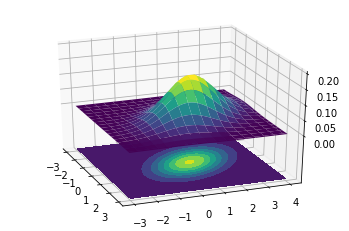

In [ ]:

Z = gaussiana_bivariada(ps, mu, Sigma)

# Crea un gráfico de superficie y un gráfico de contorno relleno proyectado debajo de él.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Ajuste los límites, las marcas y el ángulo de visión
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [ ]:
m = [2, -3, 1]

C = [[1, 1, 1], [1, 3, 2], [1, 2, 2] ]

x, y, z = np.random.multivariate_normal(m, C, size = 500).T

In [ ]:
import pandas as pd

d = {"x":x, "y": y, "z":z }

df = pd.DataFrame(data=d)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f203d3b8cd0>,
      dtype=object)

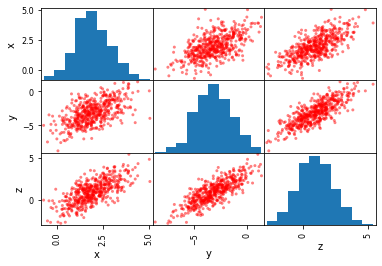

In [ ]:
pd.plotting.scatter_matrix(df, color = "red")

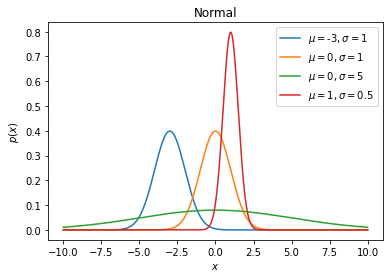

In [ ]:
class Gaussian:
    '''
    clase gaussiana
    '''
    def __init__(self, mu=0, sigma=1):
        self.mu, self.sigma = mu, sigma
        
    def densidad(self,x):
        return (2*np.pi*self.sigma**2)**(-.5) * np.exp(-.5* ((x - self.mu)/self.sigma)**2)

gaussian = Gaussian()                                       #
x_vals = np.linspace(-10,10, 1000)                          #
params = [(-3,1), (0, 1), (0,5), (1,.5)]                    #
#
for mu, sigma in params:
    gaussian.mu, gaussian.sigma = mu, sigma
    p_vals = gaussian.densidad(x_vals)
    plt.plot(x_vals, p_vals, label=r"$\mu=$"+str(mu)+r"$, \sigma=$"+str(sigma))
    
plt.xlabel(r"$x$")
plt.ylabel(r"$p(x)$")
plt.legend()
plt.title(r"Normal")
plt.show()

Dado un conjunto de muestras $x^{(1)}, \ldots, x^{(n)}$ de una distribución gaussiana, las estimaciones de máxima verosimilitud para $\mu$ y $\sigma$ son *media* y *estándar desviación* de las muestras. Uno podría derivar esto maximizando la probabilidad logarítmica.

In [ ]:
def estimacion_gaussiana(self, x):
 
    self.mu, self.sigma = np.mean(x), np.std(x)

def muestra_gaussiana(self,n):
    x = np.random.randn(n)                        
    x = self.mu + self.sigma*x                    
    return x


Gaussian.est = estimacion_gaussiana
Gaussian.muestra = muestra_gaussiana 